### Importing libraries


In [9]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import os
from keras.utils import to_categorical


### Loading the dataset

In [10]:

# Paths
train_path = r'C:\Personal\AD LAB\Cats&Dogs\training_set'
test_path = r'C:\Personal\AD LAB\Cats&Dogs\test_set'

# Function to load images and labels
def load_data(data_path):
    images, labels = [], []
    for label, folder_name in enumerate(['cats', 'dogs']):  # 0 for cats, 1 for dogs
        folder = os.path.join(data_path, folder_name)
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                images.append(cv2.resize(image, (100, 100)))
                labels.append(label)
    return np.array(images), np.array(labels)

# Load training and test data
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Print the shapes for verification
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (8005, 100, 100, 3), y_train shape: (8005,)
X_test shape: (2023, 100, 100, 3), y_test shape: (2023,)


In [13]:
X_train

array([[[[ 41.,  45.,  40.],
         [ 48.,  45.,  41.],
         [ 50.,  43.,  40.],
         ...,
         [ 96.,  95.,  91.],
         [165., 185., 186.],
         [163., 196., 199.]],

        [[ 38.,  42.,  37.],
         [ 41.,  38.,  34.],
         [ 46.,  38.,  36.],
         ...,
         [108., 104., 101.],
         [161., 178., 181.],
         [167., 195., 202.]],

        [[ 41.,  45.,  40.],
         [ 41.,  38.,  34.],
         [ 47.,  40.,  37.],
         ...,
         [ 98.,  91.,  88.],
         [160., 174., 180.],
         [170., 195., 205.]],

        ...,

        [[ 21.,  20.,  22.],
         [ 20.,  19.,  21.],
         [ 20.,  19.,  21.],
         ...,
         [ 78.,  79.,  97.],
         [ 66.,  69.,  84.],
         [ 33.,  38.,  50.]],

        [[ 24.,  23.,  25.],
         [ 18.,  17.,  20.],
         [ 21.,  20.,  22.],
         ...,
         [ 50.,  54.,  72.],
         [ 30.,  35.,  50.],
         [ 21.,  27.,  38.]],

        [[ 29.,  28.,  30.],
       

In [11]:
class_label = np.unique(y_train)
num_classes = class_label.shape[0]
print(num_classes)

2


In [12]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Normalizing


In [13]:
X_train /= 255
X_test /= 255

In [18]:
X_train

array([[[[0.16078432, 0.1764706 , 0.15686275],
         [0.1882353 , 0.1764706 , 0.16078432],
         [0.19607843, 0.16862746, 0.15686275],
         ...,
         [0.3764706 , 0.37254903, 0.35686275],
         [0.64705884, 0.7254902 , 0.7294118 ],
         [0.6392157 , 0.76862746, 0.78039217]],

        [[0.14901961, 0.16470589, 0.14509805],
         [0.16078432, 0.14901961, 0.13333334],
         [0.18039216, 0.14901961, 0.14117648],
         ...,
         [0.42352942, 0.40784314, 0.39607844],
         [0.6313726 , 0.69803923, 0.70980394],
         [0.654902  , 0.7647059 , 0.7921569 ]],

        [[0.16078432, 0.1764706 , 0.15686275],
         [0.16078432, 0.14901961, 0.13333334],
         [0.18431373, 0.15686275, 0.14509805],
         ...,
         [0.38431373, 0.35686275, 0.34509805],
         [0.627451  , 0.68235296, 0.7058824 ],
         [0.6666667 , 0.7647059 , 0.8039216 ]],

        ...,

        [[0.08235294, 0.07843138, 0.08627451],
         [0.07843138, 0.07450981, 0.08235294]

### Model Training


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [47]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(100, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu', input_shape=(100,100,3)))

#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional Layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the output
model.add(Flatten())
model.add(Dropout(0.5))
# Fully Connected Layer
model.add(Dense(50, activation='relu'))

# Output Layer
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 100)    │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 50)     │        45,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 26450)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26450)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │     1,322,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,370,502 (5.23 MB)

 Trainable params: 1,370,502 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [46]:
model.fit(X_train,y_train, batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 269s 5s/step - accuracy: 0.5786 - loss: 0.7445 - val_accuracy: 0.0000e+00 - val_loss: 0.7953
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.6142 - loss: 0.6589 - val_accuracy: 0.0056 - val_loss: 1.1181
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.6422 - loss: 0.6480 - val_accuracy: 0.0019 - val_loss: 0.8598
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - accuracy: 0.6320 - loss: 0.6463 - val_accuracy: 0.0487 - val_loss: 1.3531
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 246s 5s/step - accuracy: 0.6493 - loss: 0.6389 - val_accuracy: 0.2142 - val_loss: 0.9852
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 245s 5s/step - accuracy: 0.6898 - loss: 0.5860 - val_accuracy: 0.5509 - val_loss: 0.7177
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.7045 - loss: 0.5765 - val_accuracy: 0.3123 - val_loss: 0.9557
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - accuracy: 0.7293 - loss: 0.5451 - val_accuracy: 0.6527

KeyboardInterrupt: 

In [28]:
model.save('model.h5')

In [2]:
from keras.models import load_model
model=load_model('conv.h5')

In [14]:
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=50, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8189 - loss: 0.4627
[INFO] loss=0.5911, accuracy: 75.9763%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: Cat
Probabilities: Cat=0.99, Dog=0.01


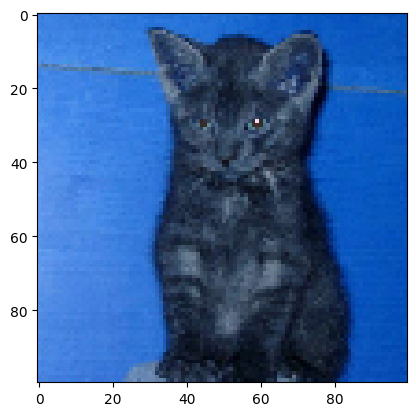

In [25]:
# Test one image from test set

test_img = X_test[112,:,:]
# print(img1.shape)
img1 = np.reshape(test_img, (1, 100,100,3))
#print(img1)


import matplotlib.pyplot as plt
plt.imshow(test_img)


prediction = model.predict(img1)
class_labels = ['Cat', 'Dog']
# Get the index of the highest probability
predicted_index = np.argmax(prediction)
# Get the corresponding label
predicted_label = class_labels[predicted_index]
# Print the result
print(f"Predicted Label: {predicted_label}")
print(f"Probabilities: Cat={prediction[0][0]:.2f}, Dog={prediction[0][1]:.2f}")